In [37]:
import pandas as pd
import random
import matplotlib.pyplot as plt


## Rising Edge

In [52]:
# the simplest method would just be to compare the differences in point locations to a minimum value
# currently assuming that any edge will continuously rise or fall and that it will be greater than 
#      1/3 of the difference between the min and max values
def detect_rising_edge(data, time_col_title, signal_col_title):  # data should lack nan values
    sum_diff = 0
    start_point = data[time_col_title][0]
    rise_List = []
    edge_min = edge_min_val(data, signal_col_title)
    for i in range(len(data)-1):
        point_diff = data[signal_col_title][i+1] - data[signal_col_title][i]
        if point_diff > 0:
            sum_diff = sum_diff + point_diff
            
        else:
            if sum_diff > edge_min:
                rise_List.append(start_point)
                
            sum_diff = 0
            start_point = data[time_col_title][i+1]
    return rise_List


## Falling Edge

In [53]:
def detect_falling_edge(data, time_col_title, signal_col_title):
    sum_diff = 0
    start_point = data[time_col_title][0]
    fall_List = []
    edge_min = edge_min_val(data, signal_col_title)
    for i in range(len(data)-1):
        point_diff = data[signal_col_title][i] - data[signal_col_title][i+1]
        if point_diff > 0:
            sum_diff = sum_diff + point_diff
            
        else:
            if sum_diff > edge_min:
                fall_List.append(start_point)
                
            sum_diff = 0
            start_point = data[time_col_title][i+1]
    return fall_List


## Finding the minimum edge value

In [54]:
def edge_min_val(data, col_title):
    # getting max and min values
    max_val = data[col_title].max()
    min_val = data[col_title].min()
    edge_val = (max_val - min_val)/3 # assuming that should be larger than any spikes in the "flat" portions
    return edge_val

# Single Function

In [55]:
def get_edges(data, time_col_title, signal_col_title):
    rising_List = detect_rising_edge(data, time_col_title, signal_col_title)
    print('The rising edges start at the following times:')
    print(rising_List)
    falling_List = detect_falling_edge(data, time_col_title, signal_col_title)
    print('The falling edges start at the following times:')
    print(falling_List)

## Examples

In [25]:
time_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
signal_data = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
d = {'time': time_data, 'signal': signal_data}
test_data = pd.DataFrame(data=d)

get_edges(test_data, 'time', 'signal')

The rising edges start at the following times:
[2, 8]
The falling edges start at the following times:
[5]


In [26]:
time_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
signal_data = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
d = {'time': time_data, 'signal': signal_data}
test_data = pd.DataFrame(data=d)

get_edges(test_data, 'time', 'signal')

The rising edges start at the following times:
[2, 8, 11]
The falling edges start at the following times:
[5, 10, 12]


In [27]:
# irregular "flat" portions of data
time_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
signal_data = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

for i in signal_data:
    i = i + random.uniform(-0.25, 0.25)

d = {'time': time_data, 'signal': signal_data}
test_data = pd.DataFrame(data=d)

get_edges(test_data, 'time', 'signal')

The rising edges start at the following times:
[2, 8, 11]
The falling edges start at the following times:
[5, 10, 12]


In [28]:
time_data = ['1:00:00.000', '1:00:01.000', '1:00:02.000', '1:00:03.000', '1:00:04.000', '1:00:05.000', '1:00:06.000', '1:00:07.000', '1:00:08.000', '1:00:09.000', '1:00:10.000', '1:00:11.000', '1:00:12.000', '1:00:13.000', '1:00:14.000']
signal_data = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

for i in signal_data:
    i = i + random.uniform(-0.25, 0.25)

d = {'time': time_data, 'signal': signal_data}
test_data = pd.DataFrame(data=d)

get_edges(test_data, 'time', 'signal')

The rising edges start at the following times:
['1:00:01.000', '1:00:07.000', '1:00:10.000']
The falling edges start at the following times:
['1:00:04.000', '1:00:09.000', '1:00:11.000']


## Change mat to csv

In [29]:
# changes mat to csv, doesn't work
import scipy.io
import pandas as pd

mat = scipy.io.loadmat('data/sigX.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.iteritems()})
data.to_csv("data_output/square_wave_1.csv")

AttributeError: 'dict' object has no attribute 'iteritems'

In [36]:
# changes mat to csv, does work
import scipy.io
import numpy as np

data = scipy.io.loadmat("data/sigX.mat")

for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt("data_output/square_wave_1.csv",data[i],delimiter=',')

## Analyze csv data

In [101]:
# I adjusted the csv file made in the cell above, to actually label the columns
square_df = pd.read_csv("data/square_wave_1.csv", keep_default_na=False, na_values=[""])
get_edges(square_df, 'Time', 'Signal')

The rising edges start at the following times:
[1.02e-08, 1.6e-08, 2.65e-08, 3.23e-08, 4.7800000000000005e-08, 5.3600000000000004e-08, 6.42e-08, 6.99e-08, 9.359999999999999e-08, 9.939999999999999e-08, 1.1e-07, 1.1599999999999999e-07, 1.31e-07, 1.37e-07, 1.48e-07, 1.53e-07, 1.82e-07, 1.8800000000000002e-07, 1.98e-07, 2.0399999999999997e-07, 2.2e-07, 2.25e-07, 2.3600000000000002e-07, 2.4199999999999997e-07, 2.65e-07, 2.7100000000000003e-07, 2.82e-07, 2.87e-07, 3.03e-07, 3.09e-07, 3.19e-07, 3.25e-07, 3.5899999999999997e-07, 3.64e-07, 3.75e-07, 3.8100000000000004e-07, 3.96e-07, 4.02e-07, 4.1200000000000004e-07, 4.1799999999999996e-07, 4.42e-07, 4.48e-07, 4.5799999999999995e-07, 4.6399999999999997e-07, 4.79e-07, 4.85e-07, 4.96e-07, 5.02e-07, 5.3e-07, 5.36e-07, 5.46e-07, 5.520000000000001e-07, 5.68e-07, 5.74e-07, 5.839999999999999e-07, 5.9e-07, 6.14e-07, 6.19e-07, 6.3e-07, 6.36e-07, 6.51e-07, 6.57e-07, 6.67e-07, 6.73e-07, 7.15e-07, 7.21e-07, 7.31e-07, 7.37e-07, 7.529999999999999e-07, 7.58e-0

The falling edges start at the following times:
[1.37e-08, 2.2599999999999997e-08, 3.01e-08, 4.21e-08, 5.1299999999999996e-08, 6.02e-08, 6.76e-08, 8.470000000000001e-08, 9.71e-08, 1.06e-07, 1.13e-07, 1.26e-07, 1.35e-07, 1.44e-07, 1.51e-07, 1.71e-07, 1.85e-07, 1.94e-07, 2.0199999999999998e-07, 2.1399999999999998e-07, 2.23e-07, 2.3199999999999999e-07, 2.39e-07, 2.56e-07, 2.69e-07, 2.7800000000000003e-07, 2.85e-07, 2.9699999999999997e-07, 3.06e-07, 3.15e-07, 3.2299999999999997e-07, 3.46e-07, 3.6200000000000004e-07, 3.7100000000000003e-07, 3.7799999999999997e-07, 3.9e-07, 4e-07, 4.0799999999999995e-07, 4.16e-07, 4.3299999999999997e-07, 4.45e-07, 4.5399999999999996e-07, 4.6200000000000003e-07, 4.74e-07, 4.83e-07, 4.92e-07, 4.99e-07, 5.2e-07, 5.34e-07, 5.429999999999999e-07, 5.5e-07, 5.62e-07, 5.71e-07, 5.8e-07, 5.88e-07, 6.05e-07, 6.17e-07, 6.26e-07, 6.33e-07, 6.45e-07, 6.55e-07, 6.629999999999999e-07, 6.709999999999999e-07, 7e-07, 7.179999999999999e-07, 7.27e-07, 7.35e-07, 7.47e-07, 7.5599

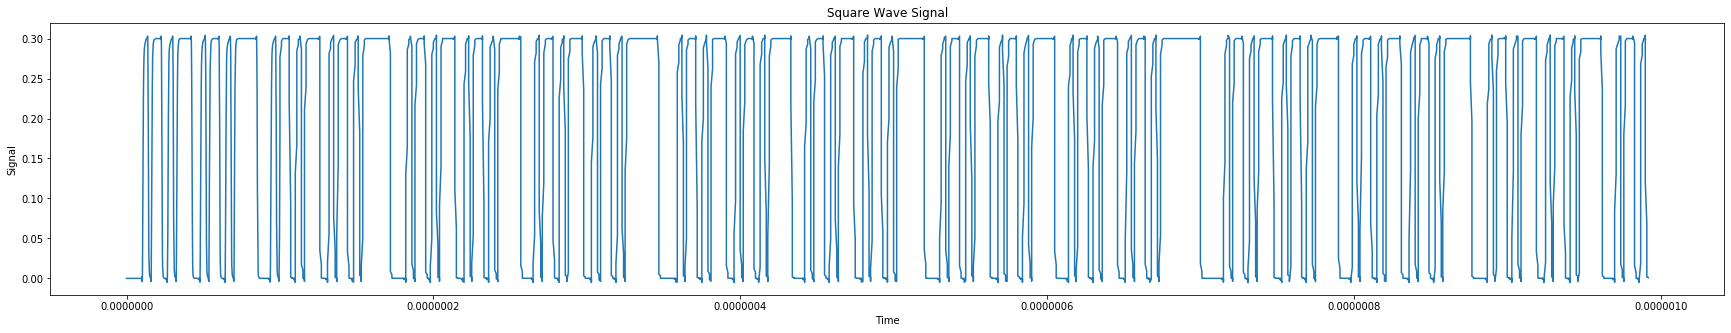

In [87]:
# plot square wave data
time_Data = []
signal_Data = []
for i in range(int(len(square_df)/10)):
    time_Data.append(square_df.Time[i])
    signal_Data.append(square_df.Signal[i])

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(30, 5)
ax.plot(time_Data, signal_Data)
ax.set_xlabel('Time')
plt.ylabel('Signal')
plt.title('Square Wave Signal')
plt.show()

In [88]:
d = {'Time': time_data, 'Signal': signal_data}
marked_df = pd.DataFrame(data=d)


In [89]:
def detect_rising_edge_ver2(data, time_col_title, signal_col_title):  # data should lack nan values
    sum_diff = 0
    start_point = data[time_col_title][0]
    rise_start_List = []
    rise_end_List = []
    edge_min = edge_min_val(data, signal_col_title)
    for i in range(len(data)-1):
        point_diff = data[signal_col_title][i+1] - data[signal_col_title][i]
        if point_diff > (edge_min/10):
            sum_diff = sum_diff + point_diff
            
        else:
            if sum_diff > edge_min:
                rise_start_List.append(start_point)
                rise_end_List.append(data[time_col_title][i+1])
                
            sum_diff = 0
            start_point = data[time_col_title][i+1]
    return rise_start_List, rise_end_List

In [90]:
def detect_falling_edge_ver2(data, time_col_title, signal_col_title):
    sum_diff = 0
    start_point = data[time_col_title][0]
    fall_start_List = []
    fall_end_List = []
    edge_min = edge_min_val(data, signal_col_title)
    for i in range(len(data)-1):
        point_diff = data[signal_col_title][i] - data[signal_col_title][i+1]
        if point_diff > (edge_min/10):
            sum_diff = sum_diff + point_diff
            
        else:
            if sum_diff > edge_min:
                fall_start_List.append(start_point)
                fall_end_List.append(data[time_col_title][i+1])
                
            sum_diff = 0
            start_point = data[time_col_title][i+1]
    return fall_start_List, fall_end_List

In [91]:
def get_edges_ver2(data, time_col_title, signal_col_title):
    rising_Start_List, rising_End_List = detect_rising_edge_ver2(data, time_col_title, signal_col_title)
    rise_d = {'Start_Time': rising_Start_List, 'End_Time': rising_End_List}
    rise_df = pd.DataFrame(data=rise_d)
    
    falling_Start_List, falling_End_List = detect_falling_edge_ver2(data, time_col_title, signal_col_title)
    fall_d = {'Start_Time': falling_Start_List, 'End_Time': falling_End_List}
    fall_df = pd.DataFrame(data=fall_d)
    
    return rise_df, fall_df

In [92]:
rise_DF, fall_DF = get_edges_ver2(marked_df, 'Time', 'Signal')
print(rise_DF)

      Start_Time      End_Time
0   1.030000e-08  1.160000e-08
1   1.610000e-08  1.720000e-08
2   2.660000e-08  2.790000e-08
3   3.240000e-08  3.410000e-08
4   4.790000e-08  4.930000e-08
..           ...           ...
86  9.410000e-07  9.420000e-07
87  9.460000e-07  9.480000e-07
88  9.700000e-07  9.710000e-07
89  9.760000e-07  9.770000e-07
90  9.860000e-07  9.880000e-07

[91 rows x 2 columns]


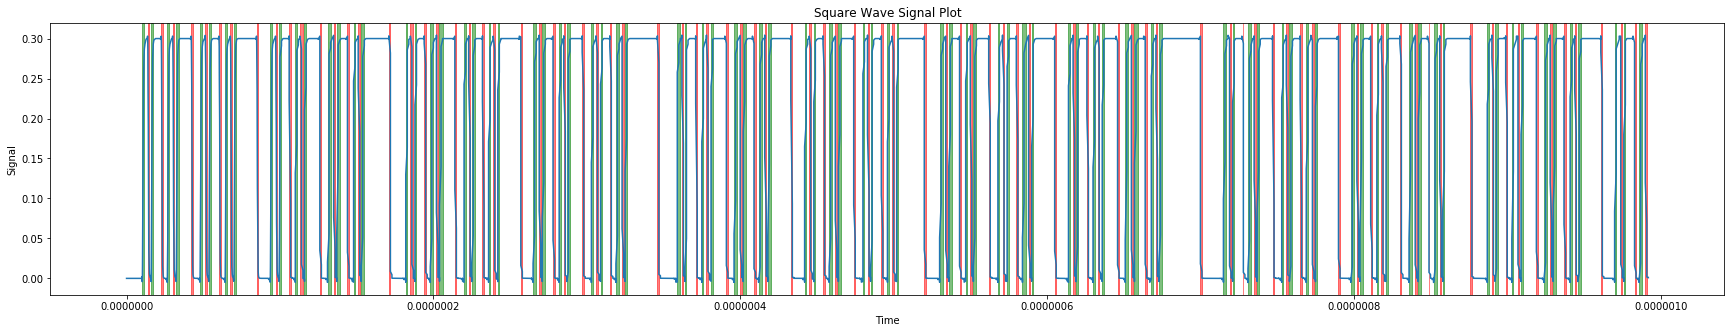

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(30, 5)
ax.plot(marked_df.Time, marked_df.Signal)
for i in range(len(rise_DF)):
    ax.axvspan(rise_DF.Start_Time[i], rise_DF.End_Time[i], alpha=0.5, color='green')

for i in range(len(fall_DF)):
    ax.axvspan(fall_DF.Start_Time[i], fall_DF.End_Time[i], alpha=0.5, color='red')
    
ax.set_xlabel('Time')
plt.ylabel('Signal')
plt.title('Square Wave Signal Plot')

plt.savefig('Square Wave Plot 1-10%.jpg')
plt.show()

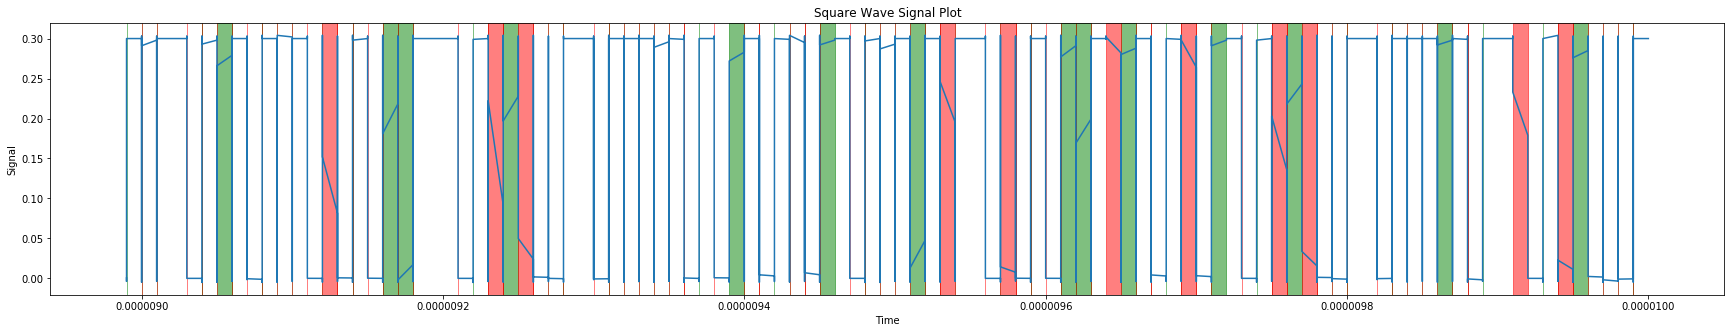

In [112]:
a = 9
b = 10
time_Data = []
signal_Data = []
# data size is 48630 points
dataset_size = len(square_df)/10
for i in range(int(a*dataset_size),int(b*dataset_size)):
    time_Data.append(square_df.Time[i])
    signal_Data.append(square_df.Signal[i])

d = {'Time': time_Data, 'Signal': signal_Data}
second_marked_df = pd.DataFrame(data=d)

rise_DF, fall_DF = get_edges_ver2(second_marked_df, 'Time', 'Signal')

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(30, 5)
ax.plot(second_marked_df.Time, second_marked_df.Signal)
for i in range(len(rise_DF)):
    ax.axvspan(rise_DF.Start_Time[i], rise_DF.End_Time[i], alpha=0.5, color='green')

for i in range(len(fall_DF)):
    ax.axvspan(fall_DF.Start_Time[i], fall_DF.End_Time[i], alpha=0.5, color='red')
    
ax.set_xlabel('Time')
plt.ylabel('Signal')
plt.title('Square Wave Signal Plot')

plt.savefig('data_output/plots/Square Wave Plot 91-100%.jpg')
plt.show()